In [1]:
#Procesamiento
import numpy as np
import pandas as pd
#Para manejo de fechas
import datetime as dt
#Manejo de valores nulos
import missingno as msn

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
ag= pd.read_csv('../datasets/android-games.csv')
ag.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [7]:
ag.tail()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1731,1/2/2020,2,The Four Winds by Kristin Hannah,120533,1.0 M,4.0,0.00,0.0,0.0,FICTION BOOK,74096,21404,10592,4736,9702,False
1732,1/3/2020,3,Every Last Fear by Alex Finlay,115437,5.0 M,2.0,0.20,0.5,0.0,FICTION BOOK,85169,16622,6802,1848,4994,True
1733,1/4/2020,4,Fake Accounts by Lauren Oyler,112408,1.0 M,4.0,0.00,1.8,0.0,FICTION BOOK,101036,3607,3237,1229,3297,False
1734,1/1/2020,1,Barack Obama,111595,1.0 M,3.0,0.90,2.3,0.0,BIOGRAPHY BOOK,88950,14856,4297,1385,2103,True
1735,1/2/2020,2,Steve Jobs,110723,10.0 M,4.0,0.76,1.9,0.0,BIOGRAPHY BOOK,64184,18332,9385,6688,12132,True


In [18]:
ag.sample(3)

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
815,3/30/2020,90,Little Panda’s Space Kitchen - Kids Cooking,54205,10.0 M,4.0,3.3,7.5,0.0,GAME EDUCATIONAL,39390,3463,2695,2136,6518,False
1725,4/5/2020,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4.0,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1168,2/12/2020,43,레이븐 : LEGION,518434,5.0 M,4.0,0.0,0.2,0.0,GAME ROLE PLAYING,324117,79581,37928,14686,62119,False


In [19]:
ag.shape

(1736, 16)

In [20]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

In [11]:
ag.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1736.0,5.022005e+01,2.902510e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1736.0,1.110679e+06,3.988018e+06,32993.0,174227.25,427693.5,883741.00,86273129.00
average rating,1728.0,3.906250e+00,2.955102e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1736.0,3.206262e+02,6.008528e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1736.0,1.221391e+02,2.250002e+03,0.0,0.20,1.0,3.30,69441.40
price,1736.0,1.090438e-02,2.146162e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1736.0,7.964405e+05,2.948668e+06,13975.0,126826.50,295735.5,618441.25,63546766.00
4 star ratings,1736.0,1.189283e+05,3.232236e+05,2451.0,20566.25,50851.0,101602.00,5404966.00
3 star ratings,1736.0,5.870517e+04,1.668288e+05,718.0,9609.00,24944.5,52087.00,3158756.00
2 star ratings,1736.0,2.824129e+04,9.569178e+04,266.0,4235.00,10614.5,23208.25,2122183.00


(array([   2.,    0.,    0.,    0.,    0.,  158.,    0.,    0.,    0.,
        1568.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

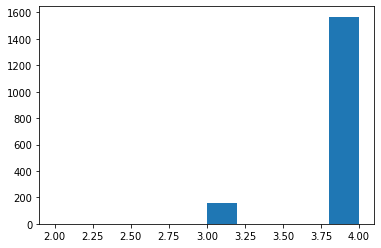

In [10]:
#Matplotlib
plt.hist(ag['average rating'])

<AxesSubplot:xlabel='paid', ylabel='count'>

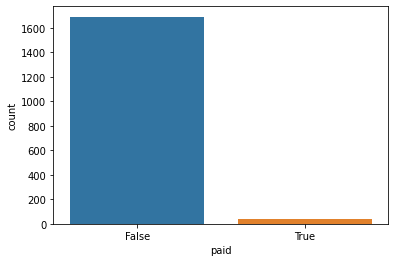

In [21]:
#Seaborn
sns.countplot(x='paid',data=ag)

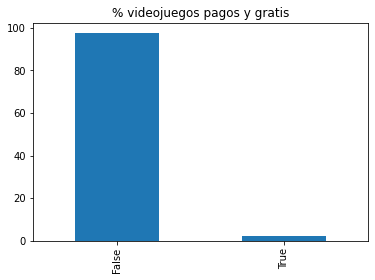

In [36]:
plot =(100 * ag['paid'].value_counts() / len(ag['paid'])).plot (kind='bar', title='% videojuegos pagos y gratis')

In [37]:
ag['paid'].value_counts()

False    1691
True       38
Name: paid, dtype: int64

In [3]:
#Plotly
fig = go.Figure()
fig.add_trace(go.Box(y=ag['growth (30 days)']))
fig.add_trace(go.Box(y=ag['growth (60 days)']))
fig.show()


In [3]:
ag.describe(include='O')

,Date,title,installs,category,paid
count,1736,1736,1736,1736,1729
unique,121,1681,9,22,2
top,1/3/2020,Solitaire,10.0 M,GAME CARD,False
freq,21,36,806,125,1691


In [ ]:
vowel={'a','e'}

In [4]:
ag['category'].unique()

array(['GAME ACTION', 'game action', 'GAME ADVENTURE', 'GAME ARCADE',
       'GAME BOARD', 'GAME CARD', 'game card', 'GAME CASINO',
       'GAME CASUAL', 'GAME EDUCATIONAL', 'GAME MUSIC', 'game music',
       'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

In [8]:
ag['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

In [7]:
ag['Date']=pd.to_datetime(ag['Date']).dt.strftime("%m/%d/%y")


In [9]:
ag['Date'].unique()

array(['01/01/20', '01/02/20', '01/03/20', '01/04/20', '01/05/20',
       '01/06/20', '01/07/20', '01/08/20', '01/09/20', '01/10/20',
       '01/11/20', '01/12/20', '01/13/20', '01/14/20', '01/15/20',
       '01/16/20', '01/17/20', '01/18/20', '01/19/20', '01/20/20',
       '01/21/20', '01/22/20', '01/23/20', '01/24/20', '01/25/20',
       '01/26/20', '01/27/20', '01/28/20', '01/29/20', '01/30/20',
       '01/31/20', '02/01/20', '02/02/20', '02/03/20', '02/04/20',
       '02/05/20', '02/06/20', '02/07/20', '02/08/20', '02/09/20',
       '02/10/20', '02/11/20', '02/12/20', '02/13/20', '02/14/20',
       '02/15/20', '02/16/20', '02/17/20', '02/18/20', '02/19/20',
       '02/20/20', '02/21/20', '02/22/20', '02/23/20', '02/24/20',
       '02/25/20', '02/26/20', '02/27/20', '02/28/20', '02/29/20',
       '03/01/20', '03/02/20', '03/03/20', '03/04/20', '03/05/20',
       '03/06/20', '03/07/20', '03/08/20', '03/09/20', '03/10/20',
       '03/11/20', '03/12/20', '03/13/20', '03/14/20', '03/15/

In [7]:
ag['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [4]:
ag.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      8
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                7
dtype: int64

In [9]:
for i in range(len(ag['price'])):
    if ag['price'][i] == 0.0:
        ag['paid'][i]=False
    else:
        ag['paid'][i]=True

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_6420/1570847807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag['paid'][i]=False
C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_6420/1570847807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag['paid'][i]=True


In [10]:
ag.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [11]:
ag.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      8
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [16]:
ag.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [20]:
ag[ag.isna().any(1)]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
334,2/4/2020,35,Pinball Pro,282866,10.0 M,NaN,0.0,0.0,0.00,GAME BOARD,190032,46076,23927,6933,15895,False
809,3/24/2020,84,Halloween Makeup Me,56154,5.0 M,NaN,0.1,0.1,0.00,GAME EDUCATIONAL,37592,6117,3688,1999,6756,False
869,2/13/2020,44,Cytus II,111679,1.0 M,NaN,0.8,1.7,1.99,GAME MUSIC,88842,11945,4620,1947,4322,True
1584,2/28/2020,59,96%: Family Quiz,77391,1.0 M,NaN,0.0,0.0,0.00,GAME TRIVIA,46468,15506,6715,2504,6196,False
1598,3/13/2020,73,Truth or Dare,61000,1.0 M,NaN,1.0,2.5,0.00,GAME TRIVIA,44911,7894,2864,1337,3992,False
1722,4/2/2020,93,Word Life - Connect crosswords puzzle,121222,10.0 M,NaN,4.6,10.4,0.00,GAME WORD,74343,25022,11196,3811,6848,False
1723,4/3/2020,94,Wordox – Free multiplayer word game,120533,1.0 M,NaN,0.0,0.0,0.00,GAME WORD,74096,21404,10592,4736,9702,False
1724,4/4/2020,95,4 Fotos 1 Palavra,115437,5.0 M,NaN,0.2,0.5,0.00,GAME WORD,85169,16622,6802,1848,4994,False


In [27]:
for i in range(len(ag['average rating'])):
    if np.isnan(ag['average rating'][i]):
        ag['average rating'][i]=4.0

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_6420/3595543761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag['average rating'][i]=4.0


In [37]:
ag.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [44]:
#Armamos un diccionario y cambiamos los valores NaN por la media de la columna
values={"average rating": 4}
ag.fillna(value=values, inplace=True)

In [45]:
ag.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [46]:
ag.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [12]:
ag[ag.duplicated()]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [11]:
ag.to_csv("../datasets/datos limpios.csv")